# K-Means Clustering

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('customers_prep.csv', sep=';')
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,1957,1,4,58138.0,0,0,58,635.0,88.0,546.0,172.0,88.0,88.000000,3.000000,8.0,10.0,4,7.0,0.0
1,1954,1,4,46344.0,1,1,38,11.0,1.0,6.0,2.0,1.0,6.000000,2.000000,1.0,1.0,2,5.0,0.0
2,1965,1,5,71613.0,0,0,26,426.0,49.0,127.0,111.0,21.0,42.000000,1.000000,8.0,2.0,10,4.0,0.0
3,1984,1,5,26646.0,1,0,26,11.0,4.0,20.0,10.0,3.0,5.000000,2.000000,2.0,0.0,4,6.0,0.0
4,1981,4,3,58293.0,1,0,94,173.0,43.0,118.0,46.0,27.0,15.000000,5.000000,5.0,3.0,6,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,1967,1,3,61223.0,0,1,46,709.0,43.0,182.0,42.0,118.0,200.271022,2.000000,9.0,3.0,4,5.0,0.0
2180,1946,4,5,64014.0,2,1,56,406.0,0.0,30.0,0.0,0.0,8.000000,6.674673,8.0,2.0,5,7.0,0.0
2181,1981,1,2,56981.0,0,0,91,908.0,48.0,217.0,32.0,12.0,24.000000,1.000000,2.0,3.0,13,6.0,0.0
2182,1956,2,5,69245.0,0,1,8,428.0,30.0,214.0,80.0,30.0,61.000000,2.000000,6.0,5.0,10,3.0,0.0


In [3]:
df.describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000
mean,1968.958791,1.963828,3.732143,51605.768773,0.435897,0.498168,49.271978,301.733190,25.918643,163.212012,37.226743,26.368263,43.128505,2.155214,4.030951,2.626507,5.788004,5.272984,0.002701
std,11.730957,1.245448,1.077038,20621.108122,0.537646,0.543142,28.957267,334.743981,37.786882,211.898063,52.881020,38.800596,49.703829,1.485845,2.620139,2.758585,3.239476,2.313576,0.028106
min,1940.000000,0.000000,0.000000,3502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,1.000000,3.000000,35178.000000,0.000000,0.000000,24.000000,23.000000,2.000000,15.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,1.000000,4.000000,51400.500000,0.000000,0.000000,50.000000,172.000000,8.000000,65.500000,12.000000,8.000000,24.000000,2.000000,3.000000,2.000000,5.000000,6.000000,0.000000
75%,1978.000000,3.000000,5.000000,68325.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,1996.000000,4.000000,7.000000,105471.000000,2.000000,2.000000,99.000000,1314.517922,146.645571,820.256597,202.596429,150.299786,200.271022,6.674673,12.198967,10.910125,13.000000,12.366082,0.294990


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Recency','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain']).round()

In [5]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2180,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2181,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2182,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Number of clusters

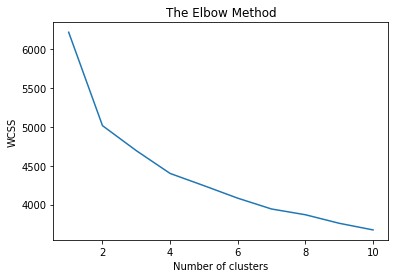

In [6]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
# Наибольшая скорость падения наблюдается при выделении 2 кластеров. Но также ещё один локоть наблюдается при выделении 4 кластеров. 

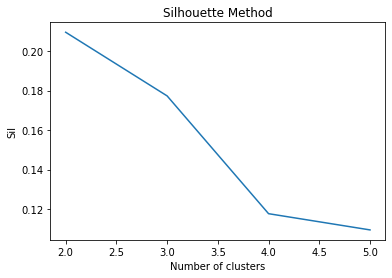

2:0.2095191835643447
3:0.17729254385398455
4:0.11767395285074579
5:0.10946070091789074


In [8]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [9]:
# Максимум этого показателя достигается на 2 кластерах. 

# Model

In [10]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Recency','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain']).round(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,0.45,0.31,0.50,0.97,0.00,0.02,0.51,0.36,0.27,0.33,0.29,0.27,0.26,0.14,0.33,0.38,0.72,0.10,0.01
1,0.63,0.30,0.51,0.05,0.03,0.02,0.49,0.01,0.01,0.00,0.01,0.01,0.04,0.20,0.07,0.01,0.06,0.57,0.01


# Feature Reduction

In [11]:
# Less features
X = df.iloc[:, [3, 9, 16]]

In [12]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Income','MntMeatProducts','NumStorePurchases']).round()

,Income,MntMeatProducts,NumStorePurchases
0,1.0,0.0,1.0
1,-0.0,0.0,0.0


# Results matching

In [13]:
# Importing hc clusters
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [15]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.7408505481645742

In [ ]:
# Результаты иерархической кластеризации пересекаются на 74% с результатами кластеризации на основе К-средних. 

# Pickle results 

In [16]:
# Export km clusters
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()